# ANHA4 Inter-annual Runoff Estimations

This notebook was used to test the runoff file sets in ANHA4-EXH001 which helps to understand how riverine tracer sources are dumped into the ocean.

# Content
1. [**Import modules & tools**](#Import-modules-&-tools)
1. [**Spatial distribution**](#Spatial-distribution)
1. [**Get runoff on each river**](#Get-runoff-on-each-river)
1. [**Compute seasonal cycle**](#Compute-seasonal-cycle)

#Import modules & tools

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [34]:
import glob
import scipy.io
import datetime
import numpy as np
import seaborn as sb
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from NEMO_tools import reporj_NEMOgrid
from dateutil.relativedelta import relativedelta
% matplotlib inline

# Spatial distribution

In [3]:
test_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/runoff/ANHA4_runoff_monthly_combined_Dai_Trenberth_Bamber_y2014.nc')
rf2014 = test_obj.variables['runoff'][:]
nav_lon = test_obj.variables['nav_lon'][:]
nav_lat = test_obj.variables['nav_lat'][:]

In [4]:
lev = np.arange(1, 11, 1)

# Get runoff on each river

In [5]:
ANHA4_MAT=scipy.io.loadmat('_data/Exchange/coord_ANHA4.mat')
ANHA4_lon=ANHA4_MAT['nav_lon']
ANHA4_lat=ANHA4_MAT['nav_lat']

In [6]:
MAT=scipy.io.loadmat('_data/Exchange/River_class.mat')
lon = MAT['lon_f']
lat = MAT['lat_f']
Class = MAT['River_class_f']

In [7]:
Class_interp = reporj_NEMOgrid(lon, lat, Class, ANHA4_lon, ANHA4_lat, method='nearest')
Class_range = reporj_NEMOgrid(lon, lat, Class, ANHA4_lon, ANHA4_lat, method='linear')
Class_interp[np.isnan(Class_range)] = np.nan

    temp[Class_interp==0] = 0 # Greenland
    temp[Class_interp==1] = Cresswell[i]
    temp[Class_interp==2] = CH[i]
    temp[Class_interp==3] = Thomsen[i]
    temp[Class_interp==4] = Clyde[i]
    temp[Class_interp==5] = Back[i]
    temp[Class_interp==6] = CPM[i]
    temp[Class_interp==7] = Mackenzie[i]
    temp[Class_interp==8] = Yukon[i]
    temp[Class_interp==9] = Kolyma[i]
    temp[Class_interp==10] = Indigirka[i]
    temp[Class_interp==11] = Yana[i]
    temp[Class_interp==12] = Lena[i]
    temp[Class_interp==13] = Olenek[i]
    temp[Class_interp==14] = Khatanga[i]
    temp[Class_interp==15] = Taimyra[i]
    temp[Class_interp==16] = Pyasina[i]
    temp[Class_interp==17] = Yenisey[i]
    temp[Class_interp==18] = Ob[i]
    temp[Class_interp==19] = Pechora[i] 
    temp[Class_interp==20] = Pechora[i] # S. Dev.
    temp[Class_interp==21] = Pechora[i] # Norway

In [8]:
rf_name = glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/runoff/*.nc')[1:]
NUM = len(rf_name)

Mackenzie = np.zeros(NUM*12)
Yukon     = np.zeros(NUM*12)
Kolyma    = np.zeros(NUM*12)
Indigirka = np.zeros(NUM*12)
Yana      = np.zeros(NUM*12)
Lena      = np.zeros(NUM*12)
Olenek    = np.zeros(NUM*12)
Khatanga  = np.zeros(NUM*12)
Taimyra   = np.zeros(NUM*12)
Pyasina   = np.zeros(NUM*12)
Yenisey   = np.zeros(NUM*12)
Ob        = np.zeros(NUM*12)
Pechora   = np.zeros(NUM*12)


for i in range(NUM):
    nc_obj = nc.Dataset(rf_name[i])
    temp_rf = nc_obj.variables['runoff'][:]
    temp_rf[temp_rf==0]=np.nan
    for j in range(12):
        temp_rf_m = temp_rf[j, :, :]
        Mackenzie[12*i+j] = np.nansum(temp_rf_m[Class_interp.T==7])
        Yukon[12*i+j]     = np.nansum(temp_rf_m[Class_interp.T==8])
        Kolyma[12*i+j]    = np.nansum(temp_rf_m[Class_interp.T==9])
        Indigirka[12*i+j] = np.nansum(temp_rf_m[Class_interp.T==10])
        Yana[12*i+j]      = np.nansum(temp_rf_m[Class_interp.T==11])
        Lena[12*i+j]      = np.nansum(temp_rf_m[Class_interp.T==12])
        Olenek[12*i+j]    = np.nansum(temp_rf_m[Class_interp.T==13])
        Khatanga[12*i+j]  = np.nansum(temp_rf_m[Class_interp.T==14])
        Taimyra[12*i+j]   = np.nansum(temp_rf_m[Class_interp.T==15])
        Pyasina[12*i+j]   = np.nansum(temp_rf_m[Class_interp.T==16])        
        Yenisey[12*i+j]   = np.nansum(temp_rf_m[Class_interp.T==17])
        Ob[12*i+j]        = np.nansum(temp_rf_m[Class_interp.T==18])
        Pechora[12*i+j]   = np.nansum(temp_rf_m[Class_interp.T==19])

In [9]:
date_list = []
base = datetime.datetime(1958, 1, 1)
date_list += [base + relativedelta(months=x) for x in range(0, NUM*12, 1)]

**The discharge of 6 largest Arctic rivers from 2010 to 2014**

In [32]:
#import matplotlib.style
#matplotlib.style.use('default')
sb.set_style('white')

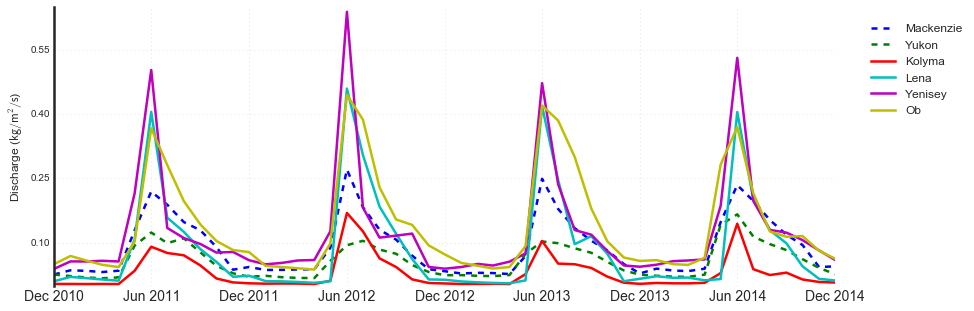

In [44]:

fig = plt.figure(figsize=(14, 5))
ax = fig.gca()
#ax.yaxis.grid(True)
ax.grid(linestyle=':')
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)\
ax.set_yticks(np.arange(0.1, 0.65, 0.15)); ax.set_ylim([0, 0.65])
ax.set_ylabel('Discharge ($\mathsf{kg/m^2/s}$)', fontsize=12)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_xlim([date_list[-49], date_list[-1]])
[i.set_linewidth(2.5) for i in ax.spines.itervalues()] 
ax.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")
ax.plot(date_list[-49:], Mackenzie[-49:], '--', label='Mackenzie', lw=2.5)
ax.plot(date_list[-49:], Yukon[-49:], '--', label='Yukon', lw=2.5)
ax.plot(date_list[-49:], Kolyma[-49:], label='Kolyma', lw=2.5, solid_capstyle="projecting")
ax.plot(date_list[-49:], Lena[-49:], label='Lena', lw=2.5, solid_capstyle="projecting")
ax.plot(date_list[-49:], Yenisey[-49:], label='Yenisey', lw=2.5, solid_capstyle="projecting")
ax.plot(date_list[-49:], Ob[-49:], label='Ob', lw=2.5, solid_capstyle="projecting")
#ax.set_title('The discharge of 6 largest Arctic rivers', fontsize=14)
LG=ax.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=1)

fig.savefig('_publish/RF_6_Rivers.pdf', dpi=400, orientation='portrait', papertype='a4', format='pdf',
                bbox_inches='tight', pad_inches=0.1)

# Compute seasonal cycle

In [12]:
t = np.arange(1, 13)
Mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [39]:
SC_Ma, _ = Nts.bin_season_cycle(date_list, Mackenzie)
SC_Yu, _ = Nts.bin_season_cycle(date_list, Yukon)
SC_Ko, _ = Nts.bin_season_cycle(date_list, Kolyma)
SC_Le, _ = Nts.bin_season_cycle(date_list, Lena)
SC_Ye, _ = Nts.bin_season_cycle(date_list, Yenisey)
SC_Ob, _ = Nts.bin_season_cycle(date_list, Ob)

SC_In, _ = Nts.bin_season_cycle(date_list, Indigirka)
SC_Ya, _ = Nts.bin_season_cycle(date_list, Yana)
SC_Ol, _ = Nts.bin_season_cycle(date_list, Olenek)
SC_Kh, _ = Nts.bin_season_cycle(date_list, Khatanga)
SC_Ta, _ = Nts.bin_season_cycle(date_list, Taimyra)
SC_Py, _ = Nts.bin_season_cycle(date_list, Pyasina)
SC_Pe, _ = Nts.bin_season_cycle(date_list, Pechora)

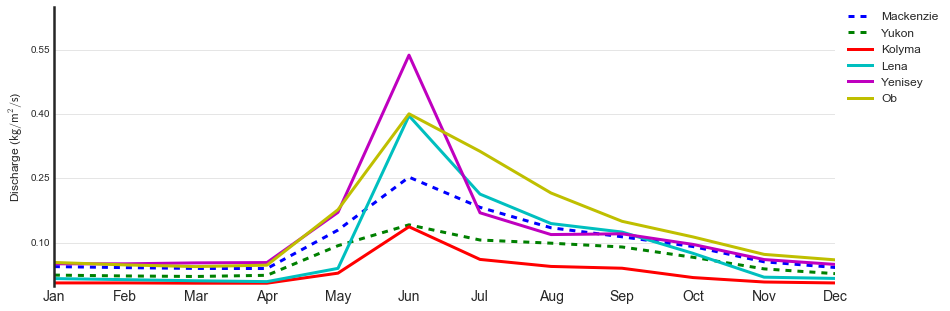

In [42]:
fig = plt.figure(figsize=(14, 5))
ax = fig.gca(); ax.yaxis.grid(True)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)


ax.set_ylabel('Discharge ($\mathsf{kg/m^2/s}$)', fontsize=12)
ax.set_xticks(range(1, 13)); ax.set_xticklabels(Mon, fontsize=14)
ax.set_yticks(np.arange(0.1, 0.65, 0.15)); ax.set_ylim([0, 0.65])

[i.set_linewidth(2.5) for i in ax.spines.itervalues()] 
ax.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")

ax.plot(t, SC_Ma, '--', solid_capstyle="projecting", label='Mackenzie', lw=3)
ax.plot(t, SC_Yu, '--', solid_capstyle="projecting", label='Yukon', lw=3)
ax.plot(t, SC_Ko, solid_capstyle="projecting", label='Kolyma', lw=3)
ax.plot(t, SC_Le, solid_capstyle="projecting", label='Lena', lw=3)
ax.plot(t, SC_Ye, solid_capstyle="projecting", label='Yenisey', lw=3)
ax.plot(t, SC_Ob, solid_capstyle="projecting", label='Ob', lw=3)
LG = ax.legend(numpoints=1, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)

In [50]:
#heatmap_rf = [13, 12]
heatmap_SC = np.vstack([SC_Ma, SC_Yu, SC_Ko, SC_Le, SC_Ye, SC_Ob, SC_In, SC_Ya, SC_Ol, SC_Kh, SC_Ta, SC_Py, SC_Pe])

In [48]:
ylabels = ['Mackenzie', 'Yukon', 'Kolyma', 'Lena', 'Yenisey', 'Ob', 
           'Indigirka', 'Yana', 'Olenek', 'Khatanga', 'Taimyra', 'Pyasina', 'Pechora']

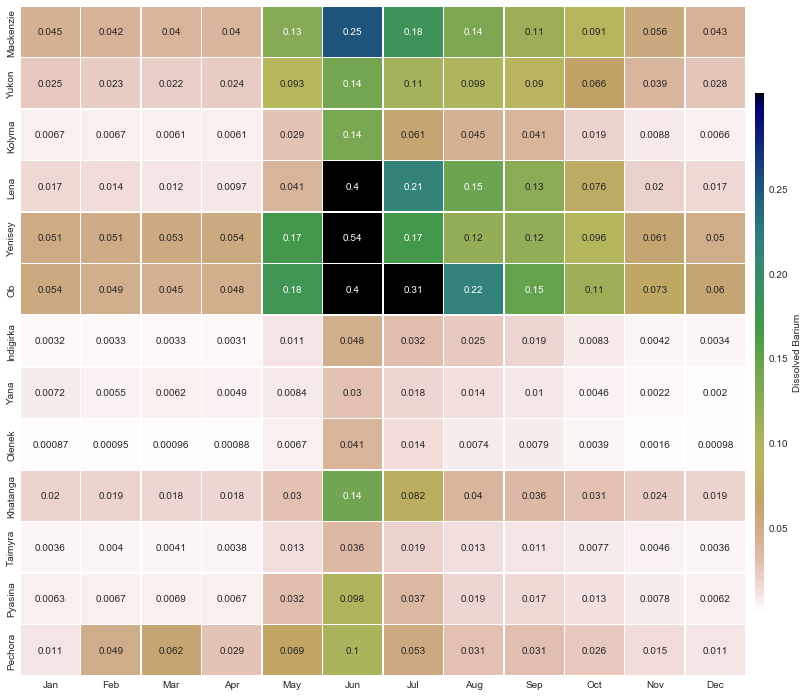

In [60]:
sb.set_style('darkgrid')
fig = plt.figure(figsize=(13, 12))
ax = fig.gca(); ax.grid()
CS = sb.heatmap(heatmap_SC, 
           cmap=plt.cm.gist_earth_r, robust=True, cbar=False, annot=True, linewidths=.5,
           xticklabels=Mon,
           yticklabels=ylabels)
cax = fig.add_axes([0.91, 0.2, 0.01, 0.6])
cbar = ax.figure.colorbar(CS.collections[0], cax=cax)
cbar.set_ticks(np.arange(0, 0.3, 0.05))
cbar.set_label('Dissolved Barium')